In [1]:
from CoinRunnerExplainerHelper import * 
from DynTSCEGraphs.fourteen.info.settings import * 
import seaborn as sns

In [2]:
USED_SUB_DIRECTORY = "fourteen" 
SAVING_SUB = os.path.join(f"Explanatory_Causal_Graph_{USED_SUB_DIRECTORY}")
os.makedirs(SAVING_SUB, exist_ok=True)
DIRPATH_IPYNB = os.path.join("..", "recordings", TAG, "data")

USED_METHOD = "grangervar2"
contextGraphsGranger = getContextGraphs(USED_METHOD, USED_SUB_DIRECTORY, transitions=1, isConcatedModel=False, usedFilters=None, verbose=False)
keys = list(contextGraphsGranger.keys())
print(keys)
USED_METHOD = "varlingam"
contextGraphsLingam = getContextGraphs(USED_METHOD, USED_SUB_DIRECTORY, transitions=1, isConcatedModel=False, usedFilters=None, verbose=False)
USED_METHOD = "lasso"
contextGraphsLasso = getContextGraphs(USED_METHOD, USED_SUB_DIRECTORY, transitions=1, isConcatedModel=False, usedFilters=None, verbose=False)


for key in keys:
    for dict in [contextGraphsGranger, contextGraphsLingam, contextGraphsLasso]:
        tmp = dict[key]
        dropIndices = [index for index in tmp.index if index.startswith("0_")]
        dropColumns = [column for column in tmp.columns if column.startswith("-1_")]
        tmp = tmp.drop(dropIndices, axis=0)
        tmp = tmp.drop(dropColumns, axis=1)
        tmp = tmp.sort_index(axis=0)
        tmp = tmp.sort_index(axis=1)
        dict[key] = tmp



print(contextGraphsGranger[keys[1]].columns)
keys = [keys[1], keys[0], keys[2]]

["{'enemyExists': True, 'powerupExists': False}", "{'enemyExists': True, 'powerupExists': True}", "{'enemyExists': False, 'powerupExists': False}"]
Index(['0_collPlayerEnemy', '0_collPlayerGoal', '0_collPlayerGoldcoin',
       '0_collPlayerPowerup', '0_collectedGoldCoin', '0_collectedPowerUp',
       '0_enemyExists', '0_goldcoinExists', '0_killedEnemy', '0_powerupExists',
       '0_score', '0_targEnemy', '0_targGoal', '0_targGoldcoin',
       '0_targPowerup', '0_terminated'],
      dtype='object')


In [3]:
df1_context1 = contextGraphsLasso[keys[0]]
df1_context2 = contextGraphsLasso[keys[1]]
df1_context3 = contextGraphsLasso[keys[2]]

df2_context1 = contextGraphsGranger[keys[0]]
df2_context2 = contextGraphsGranger[keys[1]]
df2_context3 = contextGraphsGranger[keys[2]]

df3_context1 = contextGraphsLingam[keys[0]]
df3_context2 = contextGraphsLingam[keys[1]]
df3_context3 = contextGraphsLingam[keys[2]]

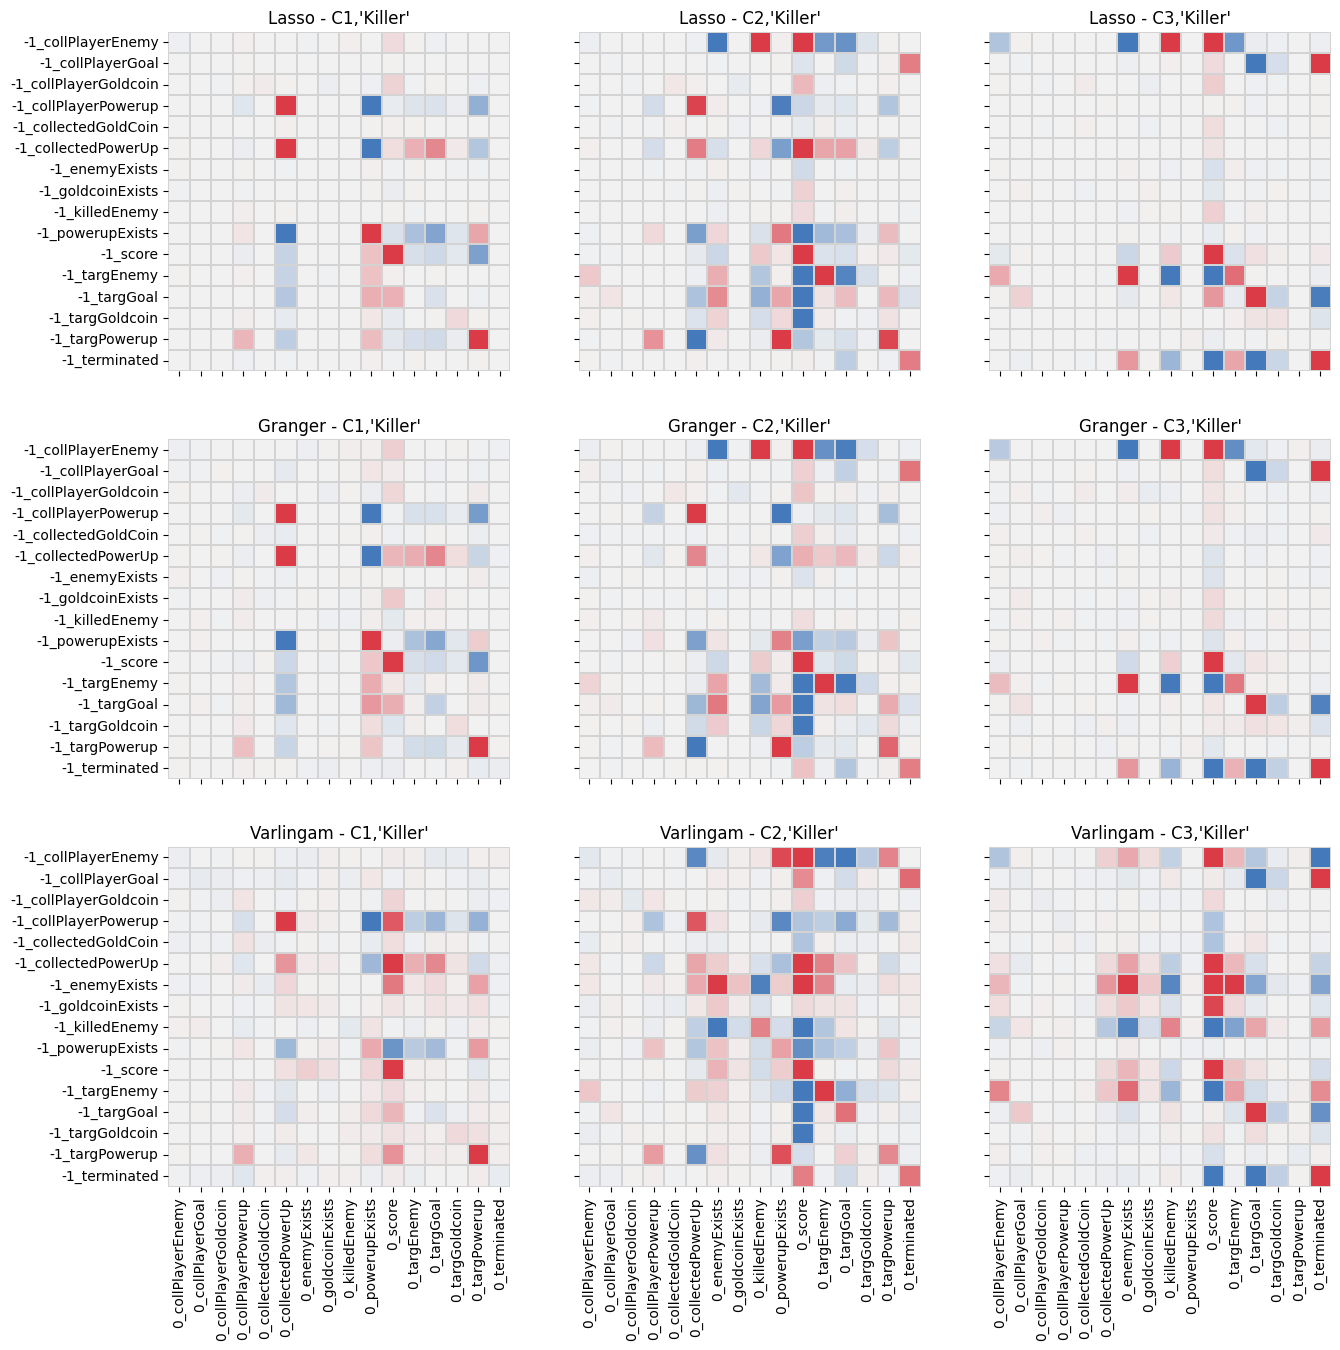

In [4]:
# Annahme: Die Dataframes sind als df1_context1, df1_context2, df1_context3, 
# df2_context1, df2_context2, df2_context3, df3_context1, df3_context2 und 
# df3_context3 gespeichert

# Erstellen Sie ein 3x3-Gitter von Heatmaps mit gemeinsamen X- und Y-Achsenbeschriftungen
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)



cmap = sns.diverging_palette(250, 10, n=21, as_cmap=True)

# Erstellen Sie die Heatmaps in der ersten Spalte mit den Y-Achsenbeschriftungen
sns.heatmap(df1_context1, cmap=cmap, center=0, ax=axs[0, 0], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df2_context1, cmap=cmap, center=0, ax=axs[1, 0], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df3_context1, cmap=cmap, center=0, ax=axs[2, 0], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")

# Erstellen Sie die Heatmaps in der zweiten Spalte
sns.heatmap(df1_context2, cmap=cmap, center=0, ax=axs[0, 1], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df2_context2, cmap=cmap, center=0, ax=axs[1, 1], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df3_context2, cmap=cmap, center=0, ax=axs[2, 1], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")

# Erstellen Sie die Heatmaps in der dritten Spalte mit den Y-Achsenbeschriftungen
sns.heatmap(df1_context3, cmap=cmap, center=0, ax=axs[0, 2], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df2_context3, cmap=cmap, center=0, ax=axs[1, 2], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")
sns.heatmap(df3_context3, cmap=cmap, center=0, ax=axs[2, 2], cbar=False, vmin=-0.25, vmax=0.25, linewidths=0.3, linecolor="lightgrey")

# Setzen Sie Titel und Achsenbeschriftungen
axs[0, 0].set_title("Lasso - C1,'Killer'")
axs[0, 1].set_title("Lasso - C2,'Killer'")
axs[0, 2].set_title("Lasso - C3,'Killer'")
axs[1, 0].set_title("Granger - C1,'Killer'")
axs[1, 1].set_title("Granger - C2,'Killer'")
axs[1, 2].set_title("Granger - C3,'Killer'")
axs[2, 0].set_title("Varlingam - C1,'Killer'")
axs[2, 1].set_title("Varlingam - C2,'Killer'")
axs[2, 2].set_title("Varlingam - C3,'Killer'")
#fig.suptitle("Comparison Discovery Methods within different contexts")


plt.savefig(os.path.join(SAVING_SUB, "CausalGraphOverview.png"), dpi=150, bbox_inches='tight')
